<a href="https://colab.research.google.com/github/Ben-Judas/Capstone-s-Project/blob/main/Contraception_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1943]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# import colorama
#from colorama import Fore

# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
import plotly as pl

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

## LOAD DATA

In [1944]:
df = pd.read_excel("capsproject.xlsx")

In [1945]:
df.head()

,Respondent's current age,Region,Type of place of residence,Highest educational level,Religion,Number of household members,Number of children 5 and under in household,Wealth index combined,Age of respondent at 1st birth,Knowledge of ovulatory cycle,Number of living children,Current contraceptive method,Current use by method type,"At health facility, told of family planning","Contraception is woman's business, man should not worry",Women who use contraception become promiscuous,Age at first cohabitation,Years since first cohabitation,Fertility preference,Husband/partner's occupation,Respondent currently working,Husband/partner's age,Respondent earns more than husband/partner,Total lifetime number of sex partners
0,31,Sud,Rural,Primary,Catholic,4,2,Middle,19,After period ended,3,Not using,No method,No,Disagree,Disagree,27,4,No more,Professional/technical/managerial,Yes,31,About the same,2
1,38,Sud,Rural,Higher,Catholic,5,1,Middle,31,Middle of the cycle,2,Injections,Modern method,No,Agree,Disagree,29,8,No more,Professional/technical/managerial,Yes,39,Less than him,2
2,35,Sud,Rural,Secondary,Catholic,6,0,Middle,23,After period ended,2,Injections,Modern method,No,Disagree,Disagree,22,12,Have another,Skilled manual,Yes,42,Less than him,2
3,37,Sud,Rural,Secondary,Catholic,7,1,Poorer,18,After period ended,5,Injections,Modern method,No,Agree,Agree,18,19,No more,Agricultural - self employed,No,53,Less than him,2
4,38,Aire Metropolitaine,Urban,Secondary,Catholic,7,0,Richest,21,After period ended,3,Not using,No method,No,Disagree,Disagree,20,18,No more,Professional/technical/managerial,Yes,49,Less than him,3


In [1946]:
#Change variable name separators to '_'
df.columns = [column.replace(" ", "_").replace("/", "_").replace("'", "_").replace(",", "") for column in df.columns]
df.columns


Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Age_at_first_cohabitation',
       'Years_since_first_cohabitation', 'Fertility_preference', 'Husband_partner_s_occupation', 'Respondent_currently_working',
       'Husband_partner_s_age', 'Respondent_earns_more_than_husband_partner', 'Total_lifetime_number_of_sex_partners'],
      dtype='object')

# DATA CLEANING

# Overview

In [1947]:
    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of rows: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print(df.columns)
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())

In [1948]:
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  1878

Number of features: 24

Data Features:
Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Age_at_first_cohabitation',
       'Years_since_first_cohabitation', 'Fertility_preference', 'Husband_partner_s_occupation', 'Respondent_currently_working',
       'Husband_partner_s_age', 'Respondent_earns_more_than_husband_partner', 'Total_lifetime_number_of_sex_partners'],
      dtype='object')

Missing values: 0

Unique values:
Respondent_s_current_age  

In [1949]:
df.shape

(1878, 24)

In [1950]:
# Check for duplicated columns
df[df.duplicated()].sum()

Respondent_s_current_age                     0.00
Region                                       0.00
Type_of_place_of_residence                   0.00
Highest_educational_level                    0.00
Religion                                     0.00
                                             ... 
Husband_partner_s_occupation                 0.00
Respondent_currently_working                 0.00
Husband_partner_s_age                        0.00
Respondent_earns_more_than_husband_partner   0.00
Total_lifetime_number_of_sex_partners        0.00
Length: 24, dtype: float64

In [1951]:
# Check null values
df.isnull().sum()

Respondent_s_current_age                      0
Region                                        0
Type_of_place_of_residence                    0
Highest_educational_level                     0
Religion                                      0
                                             ..
Husband_partner_s_occupation                  0
Respondent_currently_working                  0
Husband_partner_s_age                         0
Respondent_earns_more_than_husband_partner    0
Total_lifetime_number_of_sex_partners         0
Length: 24, dtype: int64

In [1952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Respondent_s_current_age                                1878 non-null   int64 
 1   Region                                                  1878 non-null   object
 2   Type_of_place_of_residence                              1878 non-null   object
 3   Highest_educational_level                               1878 non-null   object
 4   Religion                                                1878 non-null   object
 5   Number_of_household_members                             1878 non-null   int64 
 6   Number_of_children_5_and_under_in_household             1878 non-null   int64 
 7   Wealth_index_combined                                   1878 non-null   object
 8   Age_of_respondent_at_1st_birth                  

In [1953]:
# count column values
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

Respondent_s_current_age = 32
Region = 11
Type_of_place_of_residence = 2
Highest_educational_level = 4
Religion = 3
Number_of_household_members = 16
Number_of_children_5_and_under_in_household = 7
Wealth_index_combined = 5
Age_of_respondent_at_1st_birth = 29
Knowledge_of_ovulatory_cycle = 5
Number_of_living_children = 12
Current_contraceptive_method = 5
Current_use_by_method_type = 2
At_health_facility_told_of_family_planning = 2
Contraception_is_woman_s_business_man_should_not_worry = 2
Women_who_use_contraception_become_promiscuous = 3
Age_at_first_cohabitation = 32
Years_since_first_cohabitation = 35
Fertility_preference = 2
Husband_partner_s_occupation = 6
Respondent_currently_working = 2
Husband_partner_s_age = 45
Respondent_earns_more_than_husband_partner = 3
Total_lifetime_number_of_sex_partners = 13


In [1954]:
# make changes in target columns

df["Use_method"] = df["Current_use_by_method_type"].replace({'Modern method':'Yes', 'No method':'No'})
# df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:'Yes', 0:'No'})

In [1955]:
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Current_contraceptive_method',
 'Current_use_by_method_type',
 'At_health_facility_told_of_family_planning',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Fertility_preference',
 'Husband_partner_s_occupation',
 'Respondent_currently_working',
 'Respondent_earns_more_than_husband_partner',
 'Use_method']

In [1956]:
data = df.describe(include=[object]).T
data['%'] = data['freq']/data['count']*100
data

,count,unique,top,freq,%
Region,1878,11,Artibonite,208,11.08
Type_of_place_of_residence,1878,2,Rural,1302,69.33
Highest_educational_level,1878,4,Primary,757,40.31
Religion,1878,3,Protestant,968,51.54
Wealth_index_combined,1878,5,Poorest,493,26.25
Knowledge_of_ovulatory_cycle,1878,5,After period ended,1131,60.22
Current_contraceptive_method,1878,5,Not using,1162,61.87
Current_use_by_method_type,1878,2,No method,1162,61.87
At_health_facility_told_of_family_planning,1878,2,No,1453,77.37
Contraception_is_woman_s_business_man_should_not_worry,1878,2,Disagree,1515,80.67


In [1957]:
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

In [1958]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Respondent_s_current_age,1878.00,34.83,7.71,18.00,29.00,35.00,41.00,49.00
Number_of_household_members,1878.00,5.70,2.19,2.00,4.00,5.00,7.00,19.00
Number_of_children_5_and_under_in_household,1878.00,1.02,0.91,0.00,0.00,1.00,2.00,7.00
Age_of_respondent_at_1st_birth,1878.00,20.89,4.40,11.00,18.00,20.00,23.00,39.00
Number_of_living_children,1878.00,3.43,2.12,1.00,2.00,3.00,5.00,12.00
Age_at_first_cohabitation,1878.00,20.93,4.76,10.00,18.00,20.00,24.00,42.00
Years_since_first_cohabitation,1878.00,13.44,7.93,0.00,7.00,13.00,19.00,34.00
Husband_partner_s_age,1878.00,40.38,9.07,20.00,33.00,40.00,47.00,64.00
Total_lifetime_number_of_sex_partners,1878.00,2.27,1.55,1.00,1.00,2.00,3.00,22.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bcab0a3d0>,
      dtype=object)

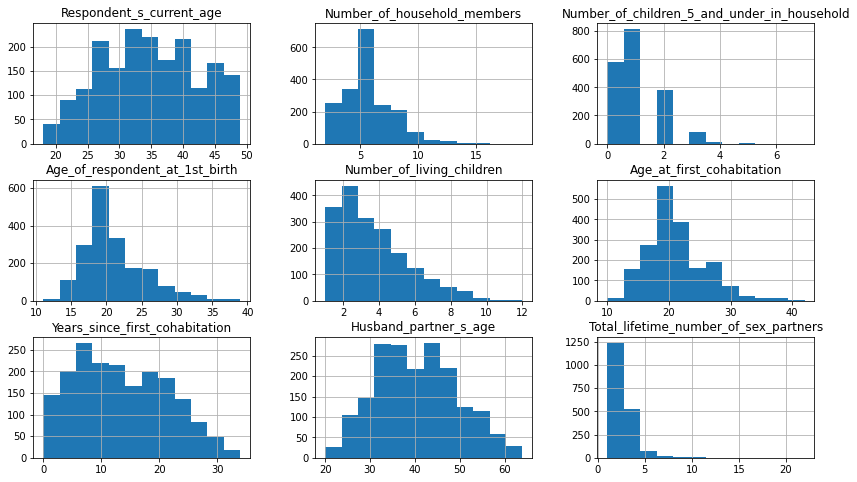

In [1959]:
df[num_cols].hist(figsize = (14,8), bins=12)

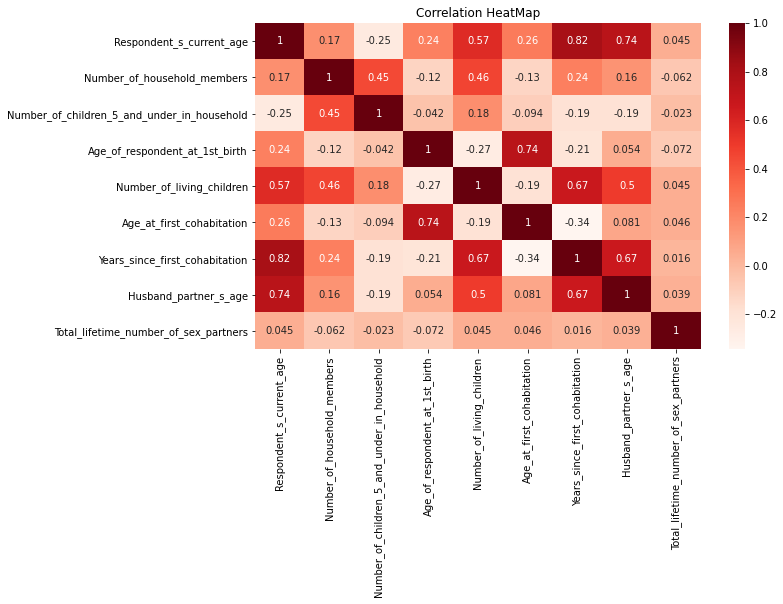

In [1960]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Reds')
plt.title('Correlation HeatMap');

## Analyze

* The correlation matrix shows that there is :
    * high correlation between 'Respondent_s_current_age' and 'Years_since_first_cohabitation' (r=0.82)

    * high correlation between 'Respondent_s_current_age' and 'Husband_partner_s_age' (r=0.74)

    * high correlation between 'Age_of_respondent_at_1st_birth' and 'Age_at_first_cohabitation' (r=0.74)

    * high correlation between 'Years_since_first_cohabitation' and 'Age_of_respondent_at_1st_birth' (r=0.67)

 These correlations means they could have an identical impact on target variable);

    * We can drop Years_since_first_cohabitation and Husband_partner_s_age, Age_at_first_cohabitation from dataset;

In [1961]:
drop_list=['Years_since_first_cohabitation', 'Husband_partner_s_age', 'Age_at_first_cohabitation']

In [1962]:
df.drop(columns=drop_list, inplace=True)

In [1963]:
num_cols=[x for x in num_cols if x not in drop_list]

In [1964]:
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Total_lifetime_number_of_sex_partners']

## TRANSFORMATION

In [1965]:
for col in df.columns:
  print(f'{col}', df[col].unique())

Respondent_s_current_age [31 38 35 37 43 33 49 40 26 39 32 27 34 22 48 19 47 21 29 25 46 41 24 36
 42 20 28 45 23 30 44 18]
Region ['Sud' 'Aire Metropolitaine' 'Artibonite' "Grand'Anse" 'Nippes' 'Nord'
 'Rest-Ouest' 'Nord-Ouest' 'Centre' 'Nord-Est' 'Sud-Est']
Type_of_place_of_residence ['Rural' 'Urban']
Highest_educational_level ['Primary' 'Higher' 'Secondary' 'No education']
Religion ['Catholic' 'Protestant' 'No religion']
Number_of_household_members [ 4  5  6  7  3  9  2 14 12  8 10 11 19 15 13 16]
Number_of_children_5_and_under_in_household [2 1 0 4 3 5 7]
Wealth_index_combined ['Middle' 'Poorer' 'Richest' 'Poorest' 'Richer']
Age_of_respondent_at_1st_birth [19 31 23 18 21 24 20 17 16 26 25 13 28 27 15 22 32 29 14 30 33 34 11 36
 35 37 38 12 39]
Knowledge_of_ovulatory_cycle ['After period ended' 'Middle of the cycle' 'Before period begins'
 'At any time' 'During her period']
Number_of_living_children [ 3  2  5  4  8  1  6  9  7 11 10 12]
Current_contraceptive_method ['Not using' 'Inj

In [1966]:
# categorical function for tenure columns
def cat_age(x, errors = "coerce"):
  if 18< x <=24:
    return '18-24'
  if 25 < x <= 31:
    return '25-31'
  if x > 32:
    return '+ 32'

''' bbbbbbbbb'''

def cat_memb(x, errors = "coerce"):
  if x < 4 :
    return 'Minus_than_4'
  if 4 <= x < 8:
    return '4-8'
  if x >= 8:
    return 'More_than_8'

''' bbbbbbbbb'''
def cat_lifetime(x, errors = "coerce"):
  if x < 3:
    return 'Minus_than_3'
  if 3 <= x < 8:
    return '3-8'
  if x >= 8:
    return 'More_than_8'

''' bbbbbbbbb'''
def cat_child(x, errors = "coerce"):
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

''' bbbbbbbbb'''
def cat_agebirth(x, errors = "coerce"):
  if x < 18:
    return 'Minus_than_18'
  if 18 <= x < 25:
    return '18-25'
  if x >= 25:
    return 'More_than_25'

''' bbbbbbbbb'''
def cat_livingchild(x, errors = "coerce"):
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

In [1967]:
df['Respondent_s_current_age']=df['Respondent_s_current_age'].apply(cat_age)
df['Number_of_household_members']=df['Number_of_household_members'].apply(cat_memb)
df['Total_lifetime_number_of_sex_partners']=df['Total_lifetime_number_of_sex_partners'].apply(cat_lifetime)
df['Number_of_children_5_and_under_in_household']=df['Number_of_children_5_and_under_in_household'].apply(cat_child)
df['Age_of_respondent_at_1st_birth']=df['Age_of_respondent_at_1st_birth'].apply(cat_agebirth)
df['Number_of_living_children']=df['Number_of_living_children'].apply(cat_livingchild)
df.head()

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Wealth_index_combined,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Number_of_living_children,Current_contraceptive_method,Current_use_by_method_type,At_health_facility_told_of_family_planning,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Fertility_preference,Husband_partner_s_occupation,Respondent_currently_working,Respondent_earns_more_than_husband_partner,Total_lifetime_number_of_sex_partners,Use_method
0,25-31,Sud,Rural,Primary,Catholic,4-8,2-4,Middle,18-25,After period ended,2-4,Not using,No method,No,Disagree,Disagree,No more,Professional/technical/managerial,Yes,About the same,Minus_than_3,No
1,+ 32,Sud,Rural,Higher,Catholic,4-8,Minus_than_2,Middle,More_than_25,Middle of the cycle,2-4,Injections,Modern method,No,Agree,Disagree,No more,Professional/technical/managerial,Yes,Less than him,Minus_than_3,Yes
2,+ 32,Sud,Rural,Secondary,Catholic,4-8,Minus_than_2,Middle,18-25,After period ended,2-4,Injections,Modern method,No,Disagree,Disagree,Have another,Skilled manual,Yes,Less than him,Minus_than_3,Yes
3,+ 32,Sud,Rural,Secondary,Catholic,4-8,Minus_than_2,Poorer,18-25,After period ended,More_than_4,Injections,Modern method,No,Agree,Agree,No more,Agricultural - self employed,No,Less than him,Minus_than_3,Yes
4,+ 32,Aire Metropolitaine,Urban,Secondary,Catholic,4-8,Minus_than_2,Richest,18-25,After period ended,2-4,Not using,No method,No,Disagree,Disagree,No more,Professional/technical/managerial,Yes,Less than him,3-8,No


In [1968]:
# Replace and regrouppimg modalities
df['Husband_partner_s_occupation']=df['Husband_partner_s_occupation'].replace({"Professional/technical/managerial": "professional_technical_managerial", "Sales": "professional_technical_managerial", "Skilled manual": "professional_technical_managerial", 'Agricultural - self employed':'Agricultural_or_Self_employed','Household and domestic':'Domestic_Unskilled', "Unskilled manual": "Domestic_Unskilled"})
df['Husband_partner_s_occupation'].unique()

array(['professional_technical_managerial',
       'Agricultural_or_Self_employed', 'Domestic_Unskilled'],
      dtype=object)

In [1969]:
# count column values again
for col in df.columns:
  print(f"{col}={df[col].nunique()}")

Respondent_s_current_age=3
Region=11
Type_of_place_of_residence=2
Highest_educational_level=4
Religion=3
Number_of_household_members=3
Number_of_children_5_and_under_in_household=3
Wealth_index_combined=5
Age_of_respondent_at_1st_birth=3
Knowledge_of_ovulatory_cycle=5
Number_of_living_children=3
Current_contraceptive_method=5
Current_use_by_method_type=2
At_health_facility_told_of_family_planning=2
Contraception_is_woman_s_business_man_should_not_worry=2
Women_who_use_contraception_become_promiscuous=3
Fertility_preference=2
Husband_partner_s_occupation=3
Respondent_currently_working=2
Respondent_earns_more_than_husband_partner=3
Total_lifetime_number_of_sex_partners=3
Use_method=2


In [1970]:
select=['Region','Religion','Type_of_place_of_residence','Highest_educational_level', 'Number_of_household_members','Number_of_children_5_and_under_in_household','Number_of_living_children','Age_of_respondent_at_1st_birth','At_health_facility_told_of_family_planning','Contraception_is_woman_s_business_man_should_not_worry','Women_who_use_contraception_become_promiscuous','Fertility_preference','Respondent_currently_working','Respondent_earns_more_than_husband_partner','Husband_partner_s_occupation','Wealth_index_combined','Knowledge_of_ovulatory_cycle','Current_contraceptive_method','Total_lifetime_number_of_sex_partners','Use_method']

In [1971]:
df[select].head()

,Region,Religion,Type_of_place_of_residence,Highest_educational_level,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_living_children,Age_of_respondent_at_1st_birth,At_health_facility_told_of_family_planning,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Fertility_preference,Respondent_currently_working,Respondent_earns_more_than_husband_partner,Husband_partner_s_occupation,Wealth_index_combined,Knowledge_of_ovulatory_cycle,Current_contraceptive_method,Total_lifetime_number_of_sex_partners,Use_method
0,Sud,Catholic,Rural,Primary,4-8,2-4,2-4,18-25,No,Disagree,Disagree,No more,Yes,About the same,professional_technical_managerial,Middle,After period ended,Not using,Minus_than_3,No
1,Sud,Catholic,Rural,Higher,4-8,Minus_than_2,2-4,More_than_25,No,Agree,Disagree,No more,Yes,Less than him,professional_technical_managerial,Middle,Middle of the cycle,Injections,Minus_than_3,Yes
2,Sud,Catholic,Rural,Secondary,4-8,Minus_than_2,2-4,18-25,No,Disagree,Disagree,Have another,Yes,Less than him,professional_technical_managerial,Middle,After period ended,Injections,Minus_than_3,Yes
3,Sud,Catholic,Rural,Secondary,4-8,Minus_than_2,More_than_4,18-25,No,Agree,Agree,No more,No,Less than him,Agricultural_or_Self_employed,Poorer,After period ended,Injections,Minus_than_3,Yes
4,Aire Metropolitaine,Catholic,Urban,Secondary,4-8,Minus_than_2,2-4,18-25,No,Disagree,Disagree,No more,Yes,Less than him,professional_technical_managerial,Richest,After period ended,Not using,3-8,No


In [1972]:
df1 = df[df['Use_method']=='Yes']
Partner = df1.groupby(by=['Use_method','Number_of_living_children','Fertility_preference']).size().to_frame()
Partner.columns = ['Total']
Partner['%'] = Partner/Partner.Total.sum()*100
Partner

Total     %
Use_method Number_of_living_children Fertility_preference             
Yes        2-4                       Have another             89 12.43
                                     No more                 246 34.36
           Minus_than_2              Have another            107 14.94
                                     No more                  16  2.23
           More_than_4               Have another             10  1.40
                                     No more                 248 34.64

In [1973]:
df.dtypes

Respondent_s_current_age                      object
Region                                        object
Type_of_place_of_residence                    object
Highest_educational_level                     object
Religion                                      object
                                               ...  
Husband_partner_s_occupation                  object
Respondent_currently_working                  object
Respondent_earns_more_than_husband_partner    object
Total_lifetime_number_of_sex_partners         object
Use_method                                    object
Length: 22, dtype: object

In [1974]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['Type_of_place_of_residence',
 'Current_use_by_method_type',
 'At_health_facility_told_of_family_planning',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Fertility_preference',
 'Respondent_currently_working',
 'Use_method']

In [1975]:
multi_cols = [col for col in df.columns if df[col].nunique() > 2]
multi_cols

['Respondent_s_current_age',
 'Region',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Wealth_index_combined',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'Current_contraceptive_method',
 'Women_who_use_contraception_become_promiscuous',
 'Husband_partner_s_occupation',
 'Respondent_earns_more_than_husband_partner',
 'Total_lifetime_number_of_sex_partners']

In [1976]:
df.columns

Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Fertility_preference',
       'Husband_partner_s_occupation', 'Respondent_currently_working', 'Respondent_earns_more_than_husband_partner',
       'Total_lifetime_number_of_sex_partners', 'Use_method'],
      dtype='object')

In [1977]:
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = df[col].astype('category')

In [1978]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Respondent_s_current_age                                1732 non-null   category
 1   Region                                                  1878 non-null   category
 2   Type_of_place_of_residence                              1878 non-null   category
 3   Highest_educational_level                               1878 non-null   category
 4   Religion                                                1878 non-null   category
 5   Number_of_household_members                             1878 non-null   category
 6   Number_of_children_5_and_under_in_household             1878 non-null   category
 7   Wealth_index_combined                                   1878 non-null   category
 8   Age_of_respondent_at_1st_bir

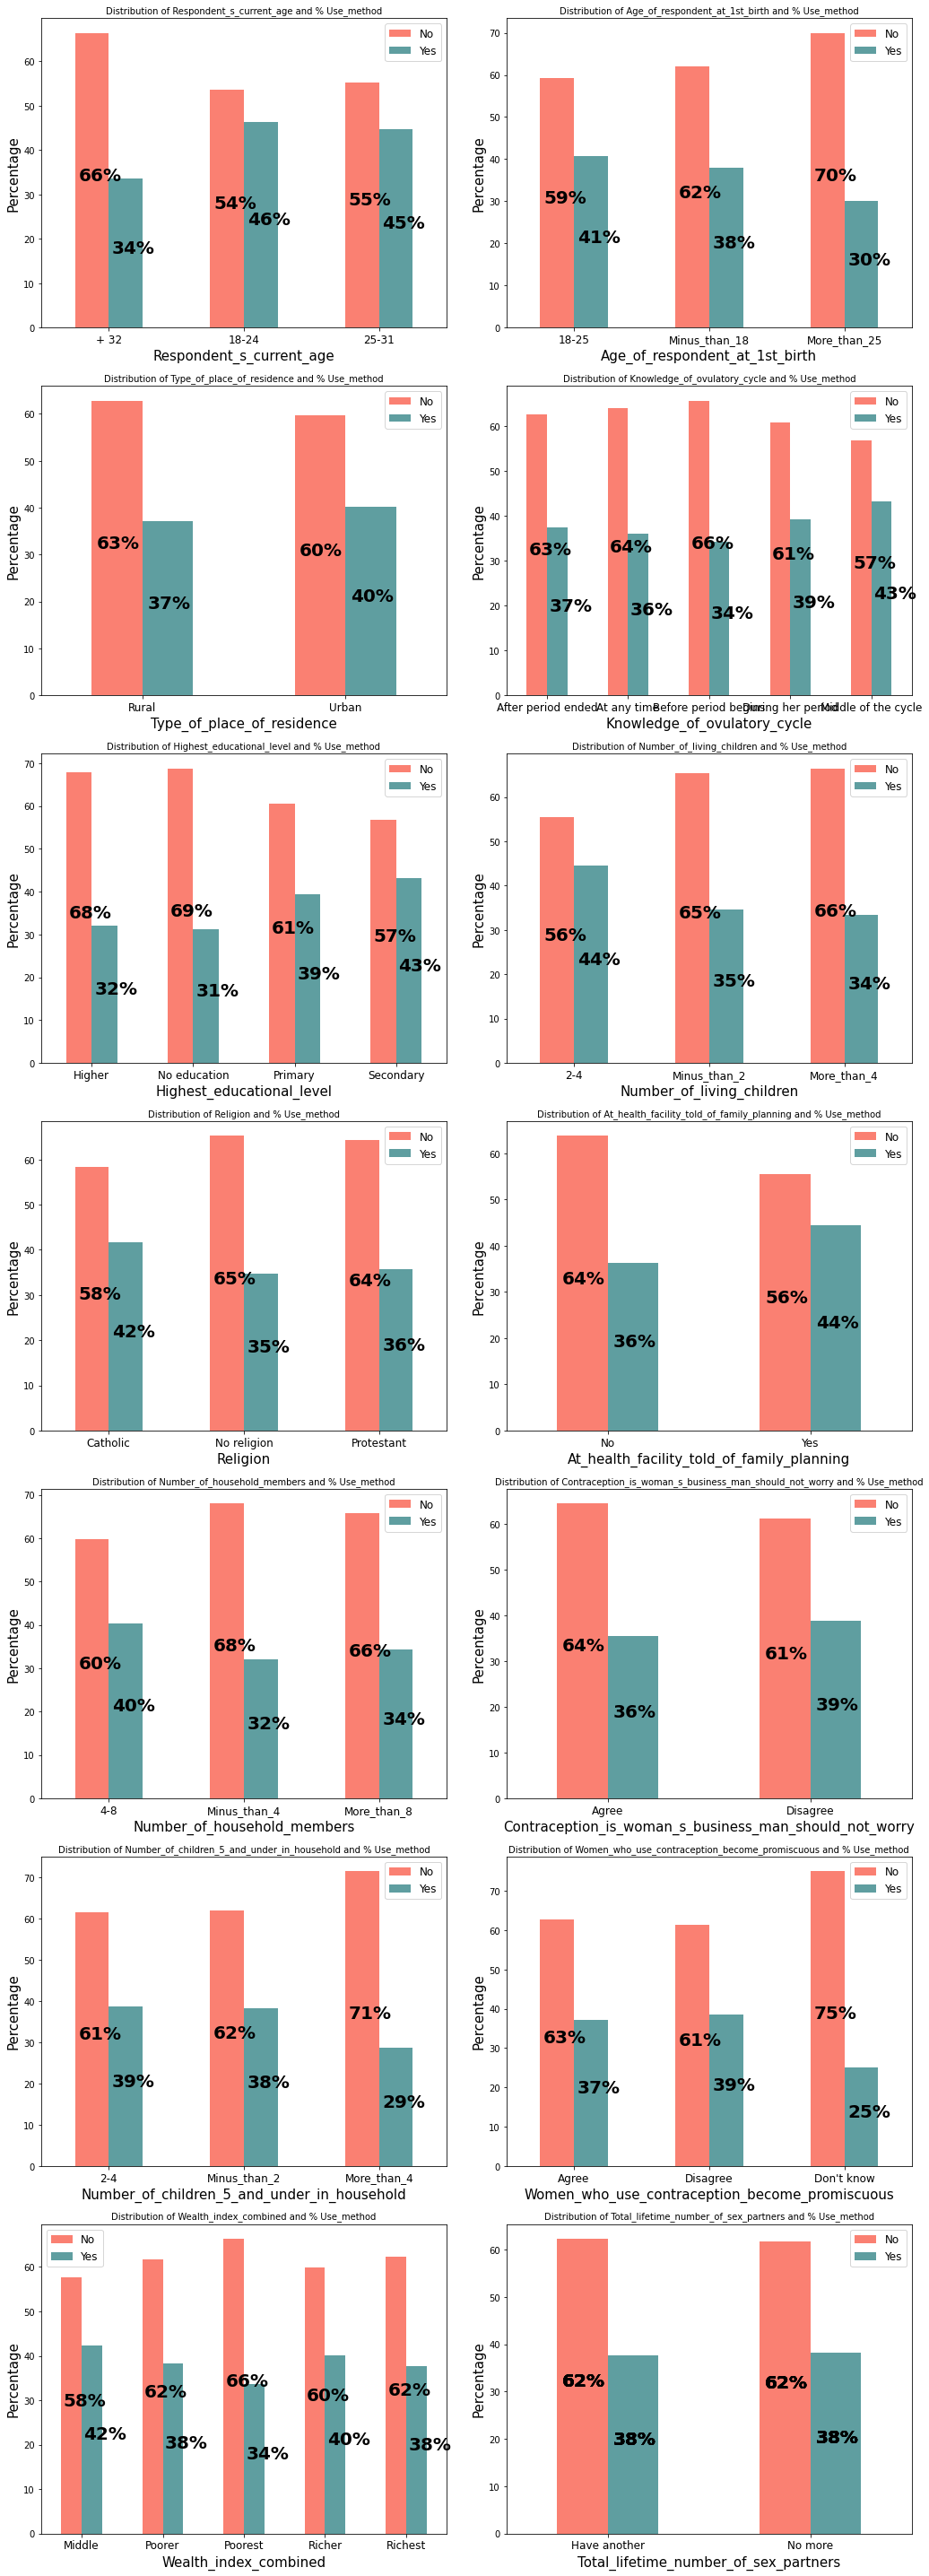

In [1979]:
# trans_df = df.drop(df.iloc[-1])
#data["Churn"].replace(to_replace = "Yes", value = 1, inplace =True)
#data["Churn"].replace(to_replace = "No", value = 0, inplace = True)

#draw bar plot
cate_cols = ['Respondent_s_current_age', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Fertility_preference',
       'Husband_partner_s_occupation', 'Respondent_currently_working', 'Respondent_earns_more_than_husband_partner',
       'Total_lifetime_number_of_sex_partners']
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 7,ncols = 2,figsize = (15,40))

for i,feature in enumerate(cate_cols):
    if i < 7:
        ax = df.groupby([feature,'Use_method']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 7 and i < 14:
        ax = df.groupby([feature,'Use_method']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-7,1])
    
    ax.set_title("Distribution of {} and % Use_method".format(feature), fontsize = 10)
    ax.set_ylabel("Percentage", fontsize=15)
    ax.set_xlabel("{}".format(feature), fontsize=15)
    ax.legend(["No", "Yes"], fontsize=12)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [1980]:
data = pd.get_dummies(df)
data.head()

,Respondent_s_current_age_+ 32,Respondent_s_current_age_18-24,Respondent_s_current_age_25-31,Region_Aire Metropolitaine,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Rural,Type_of_place_of_residence_Urban,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Protestant,Number_of_household_members_4-8,Number_of_household_members_Minus_than_4,Number_of_household_members_More_than_8,Number_of_children_5_and_under_in_household_2-4,Number_of_children_5_and_under_in_household_Minus_than_2,Number_of_children_5_and_under_in_household_More_than_4,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Age_of_respondent_at_1st_birth_18-25,Age_of_respondent_at_1st_birth_Minus_than_18,Age_of_respondent_at_1st_birth_More_than_25,Knowledge_of_ovulatory_cycle_After period ended,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Number_of_living_children_2-4,Number_of_living_children_Minus_than_2,Number_of_living_children_More_than_4,Current_contraceptive_method_Implants/Norplant,Current_contraceptive_method_Injections,Current_contraceptive_method_Male condom,Current_contraceptive_method_Not using,Current_contraceptive_method_Pill,Current_use_by_method_type_Modern method,Current_use_by_method_type_No method,At_health_facility_told_of_family_planning_No,At_health_facility_told_of_family_planning_Yes,Contraception_is_woman_s_business_man_should_not_worry_Agree,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Women_who_use_contraception_become_promiscuous_Agree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Fertility_preference_Have another,Fertility_preference_No more,Husband_partner_s_occupation_Agricultural_or_Self_employed,Husband_partner_s_occupation_Domestic_Unskilled,Husband_partner_s_occupation_professional_technical_managerial,Respondent_currently_working_No,Respondent_currently_working_Yes,Respondent_earns_more_than_husband_partner_About the same,Respondent_earns_more_than_husband_partner_Less than him,Respondent_earns_more_than_husband_partner_More than him,Total_lifetime_number_of_sex_partners_3-8,Total_lifetime_number_of_sex_partners_Minus_than_3,Total_lifetime_number_of_sex_partners_More_than_8,Use_method_No,Use_method_Yes
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0


In [1981]:
def label_encoder(dataframe, cat_cols):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[cat_cols] = labelencoder.fit_transform(dataframe[cat_cols])
    return dataframe

In [1982]:
#df1=df.copy()

In [1983]:
#for col in cat_cols:
    #label_encoder(df1, col)

In [1984]:
#df1.head()

In [1985]:
data.columns

Index(['Respondent_s_current_age_+ 32', 'Respondent_s_current_age_18-24', 'Respondent_s_current_age_25-31', 'Region_Aire Metropolitaine',
       'Region_Artibonite', 'Region_Centre', 'Region_Grand'Anse', 'Region_Nippes', 'Region_Nord', 'Region_Nord-Est', 'Region_Nord-Ouest',
       'Region_Rest-Ouest', 'Region_Sud', 'Region_Sud-Est', 'Type_of_place_of_residence_Rural', 'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher', 'Highest_educational_level_No education', 'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic', 'Religion_No religion', 'Religion_Protestant', 'Number_of_household_members_4-8',
       'Number_of_household_members_Minus_than_4', 'Number_of_household_members_More_than_8', 'Number_of_children_5_and_under_in_household_2-4',
       'Number_of_children_5_and_under_in_household_Minus_than_2', 'Number_of_children_5_and_under_in_household_More_than_4',
       'Wealth_index_combined_Middle', 'Wealth_ind

In [1986]:
sel=['Respondent_s_current_age_+ 32', 'Respondent_s_current_age_18-24', 'Respondent_s_current_age_25-31','Type_of_place_of_residence_Rural', 'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher', 'Highest_educational_level_No education', 'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic', 'Religion_No religion', 'Religion_Protestant', 'Number_of_household_members_4-8',
       'Number_of_household_members_Minus_than_4', 'Number_of_household_members_More_than_8', 'Number_of_children_5_and_under_in_household_2-4',
       'Number_of_children_5_and_under_in_household_Minus_than_2', 'Number_of_children_5_and_under_in_household_More_than_4',
       'Wealth_index_combined_Middle', 'Wealth_index_combined_Poorer', 'Wealth_index_combined_Poorest', 'Wealth_index_combined_Richer',
       'Wealth_index_combined_Richest', 'Age_of_respondent_at_1st_birth_18-25', 'Age_of_respondent_at_1st_birth_Minus_than_18',
       'Age_of_respondent_at_1st_birth_More_than_25', 'Knowledge_of_ovulatory_cycle_After period ended', 'Knowledge_of_ovulatory_cycle_At any time',
       'Knowledge_of_ovulatory_cycle_Before period begins', 'Knowledge_of_ovulatory_cycle_During her period',
       'Knowledge_of_ovulatory_cycle_Middle of the cycle', 'Number_of_living_children_2-4', 'Number_of_living_children_Minus_than_2',
       'Number_of_living_children_More_than_4', 'At_health_facility_told_of_family_planning_No',
       'At_health_facility_told_of_family_planning_Yes', 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
       'Contraception_is_woman_s_business_man_should_not_worry_Disagree', 'Women_who_use_contraception_become_promiscuous_Agree',
       'Women_who_use_contraception_become_promiscuous_Disagree', "Women_who_use_contraception_become_promiscuous_Don't know",
       'Fertility_preference_Have another', 'Fertility_preference_No more', 'Husband_partner_s_occupation_Agricultural_or_Self_employed',
       'Husband_partner_s_occupation_Domestic_Unskilled', 'Husband_partner_s_occupation_professional_technical_managerial',
       'Respondent_currently_working_No', 'Respondent_currently_working_Yes', 'Respondent_earns_more_than_husband_partner_About the same',
       'Respondent_earns_more_than_husband_partner_Less than him', 'Respondent_earns_more_than_husband_partner_More than him',
       'Total_lifetime_number_of_sex_partners_3-8', 'Total_lifetime_number_of_sex_partners_Minus_than_3',
       'Total_lifetime_number_of_sex_partners_More_than_8']

In [1987]:
import sys
from termcolor import colored, cprint
text = colored('Hello, World!', 'red', attrs=['reverse', 'blink'])
print(text)

Hello, World!


In [1988]:
def chisq(df,name):
    stat, p, df, arr = chi2_contingency(pd.crosstab(df, data.Use_method_Yes))
    if p < 0.05:
      print(colored('We can reject the Null Hypothesis for {}  {}'.format(name, p),'red'))
    else: 
      print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [1989]:
    #else: 
    # print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [1990]:
for i in data[sel].columns:
  #for v in [0.0000, 0.0499]:
    #if v < p:
  chisq(data[i],i)

We can reject the Null Hypothesis for Respondent_s_current_age_+ 32  1.8521318106538768e-06
We can reject the Null Hypothesis for Respondent_s_current_age_18-24  0.021089780741436744
We can reject the Null Hypothesis for Respondent_s_current_age_25-31  0.0010928257325066501
We fail to reject the Null Hypothesis for Type_of_place_of_residence_Rural 0.22032231320227874
We fail to reject the Null Hypothesis for Type_of_place_of_residence_Urban 0.22032231320227874
We fail to reject the Null Hypothesis for Highest_educational_level_Higher 0.4259210297298147
We can reject the Null Hypothesis for Highest_educational_level_No education  0.00024397217765052934
We fail to reject the Null Hypothesis for Highest_educational_level_Primary 0.3892722032221576
We can reject the Null Hypothesis for Highest_educational_level_Secondary  0.0036153875869754356
We can reject the Null Hypothesis for Religion_Catholic  0.008418068236999013
We fail to reject the Null Hypothesis for Religion_No religion 0.50749

In [1991]:
selected=['Respondent_s_current_age_+ 32', 
          'Respondent_s_current_age_18-24',
          'Respondent_s_current_age_25-31',
          'Region_Rest-Ouest',
          'Highest_educational_level_No education',
          'Highest_educational_level_Secondary',
          'Religion_Catholic',
          'Religion_Protestant',
          'Number_of_household_members_4-8',
          'Number_of_household_members_Minus_than_4',
          'Wealth_index_combined_Poorest',
          'Age_of_respondent_at_1st_birth_18-25',
          'Age_of_respondent_at_1st_birth_More_than_25',
          'Number_of_living_children_2-4',
          'Number_of_living_children_More_than_4',
          'Knowledge_of_ovulatory_cycle_Middle of the cycle',
          'At_health_facility_told_of_family_planning_Yes',
          'At_health_facility_told_of_family_planning_No',
          'Respondent_earns_more_than_husband_partner_Less than him',
          'Total_lifetime_number_of_sex_partners_3-8',
          'Total_lifetime_number_of_sex_partners_Minus_than_3',
          'Use_method_Yes']

In [1992]:
telco=data[selected]

In [1993]:
import statsmodels.api as sm
X = telco.drop('Use_method_Yes', axis=1)
y = telco['Use_method_Yes']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 99.931650
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Use_method_Yes   No. Observations:                 1878
Model:                          Logit   Df Residuals:                     1857
Method:                           MLE   Df Model:                           20
Date:                Fri, 10 Sep 2021   Pseudo R-squ.:                     inf
Time:                        18:53:54   Log-Likelihood:            -1.8767e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Respondent_s_cu

In [1994]:
reg=['Region_Rest-Ouest','Age_of_respondent_at_1st_birth_More_than_25','Number_of_living_children_2-4','Knowledge_of_ovulatory_cycle_Middle of the cycle','At_health_facility_told_of_family_planning_Yes','Use_method_Yes']

In [1995]:
tel=telco[reg]

In [2007]:
X = tel.drop('Use_method_Yes', axis=1)
y = tel['Use_method_Yes']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=49)
lr  = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

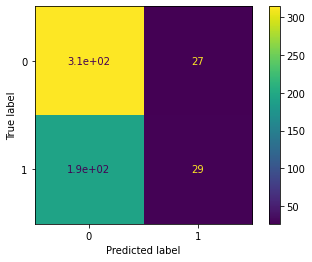

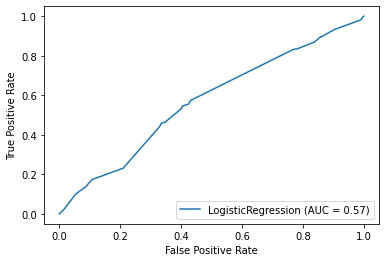

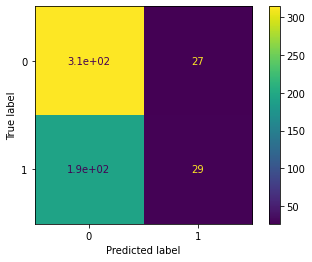

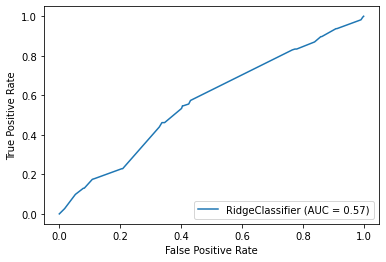

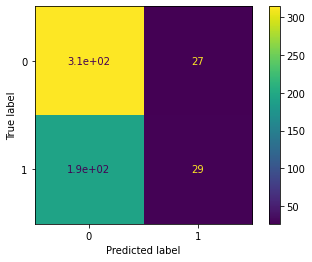

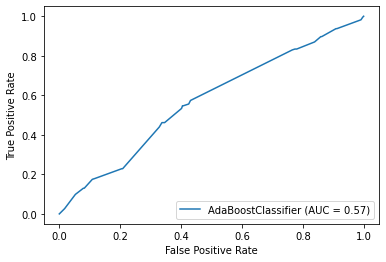

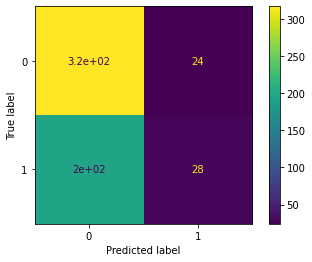

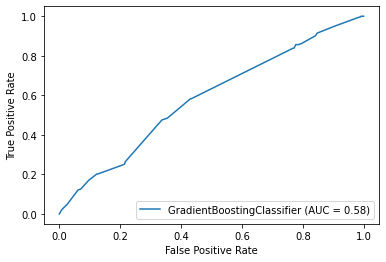

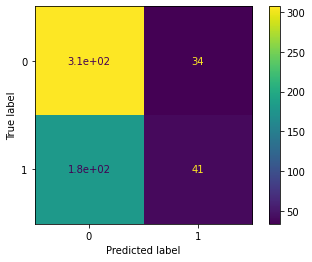

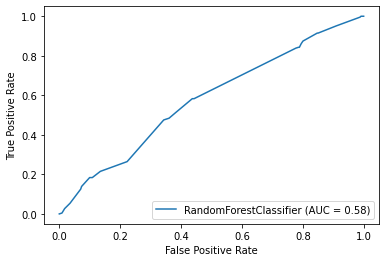

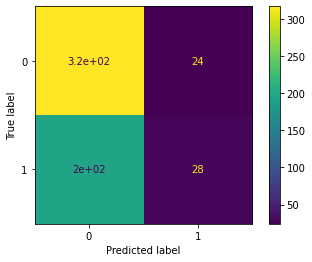

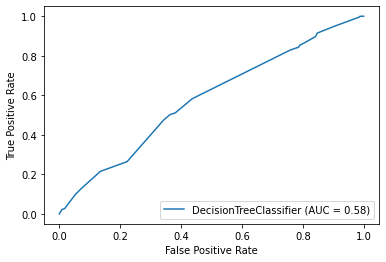

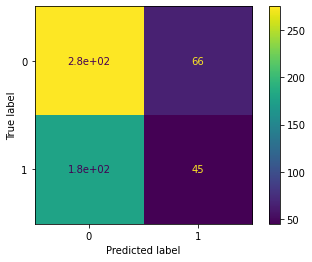

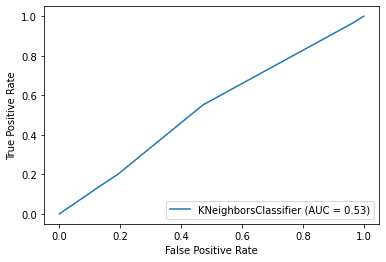

In [2005]:
import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

telcom = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [1999]:
telcom

,names,scores,times
0,LogisticRegression,0.61,0.05
1,RidgeClassifier,0.61,0.03
2,AdaBoostClassifier,0.61,0.20
3,GradientBoostingClassifier,0.60,0.25
4,RandomForestClassifier,0.60,0.27
5,DecisionTreeClassifier,0.52,0.01
6,KNeighborsClassifier,0.58,0.01


In [2009]:
from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74       341
           1       0.52      0.13      0.21       223

    accuracy                           0.61       564
   macro avg       0.57      0.53      0.47       564
weighted avg       0.58      0.61      0.53       564



In [ ]:
# = np.where(df['Husband_partner_s_occupation'] == 'Skilled manual', 'Professional/technical/managerial', 'self_employed')

In [ ]:
#df['Husband_partner_s_occupation'].unique()

In [ ]:
# Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

In [ ]:
pie_plot(df["Use_method"].value_counts(), plot_title="Current use by method type Distribution")

In [ ]:
pie_plot(df["Current_contraceptive_method"].value_counts(), plot_title="Current contraceptive method Distribution")